**Evento** : Germinación de la semilla

**Survival**: El evento de interes no ocurre

**Survival duration**: Tiempo hasta que ocurra el evento de interés (o el final de nuestras observaciones)

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Read the Excel sheet
df = pd.read_excel('DATOS T1 Y T9_V3-2.xlsx', sheet_name='Germina', usecols=['T1_180', 'T9_180', 'T1_250', 'T9_250', 'T1_395',
       'T9_395', 'T1_410', 'T9_410'])#, parse_dates=['H'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1_180  238 non-null    object
 1   T9_180  255 non-null    object
 2   T1_250  258 non-null    object
 3   T9_250  259 non-null    object
 4   T1_395  254 non-null    object
 5   T9_395  257 non-null    object
 6   T1_410  260 non-null    object
 7   T9_410  260 non-null    object
dtypes: object(8)
memory usage: 16.4+ KB


In [17]:
# Remove 'h' from values while preserving non-string values
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.replace(' h', '') if isinstance(x, str) else x)

#df.tail(30)

In [18]:
df[['T1_180', 'T9_180', 'T1_250', 'T9_250', 'T1_395',
       'T9_395', 'T1_410', 'T9_410']]=df[['T1_180', 'T9_180', 'T1_250', 'T9_250', 'T1_395',
       'T9_395', 'T1_410', 'T9_410']].astype('float')

In [19]:
# Melt the DataFrame to create 'Measurement' and 'Value' columns
melted_df = pd.melt(df, var_name="Measurement", value_name="Time")

In [20]:
# Extract the measurement type (T1 or T9) from the column name
melted_df["Material"] = melted_df["Measurement"].str.split("_").str[0]
melted_df["UV"] = melted_df["Measurement"].str.split("_").str[1]

In [21]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measurement  2080 non-null   object 
 1   Time         2041 non-null   float64
 2   Material     2080 non-null   object 
 3   UV           2080 non-null   object 
dtypes: float64(1), object(3)
memory usage: 65.1+ KB


In [22]:
melted_df['UV']=melted_df['UV'].astype('category')
melted_df['Time']=melted_df['Time'].astype('float')

# Plots 

Text(0, 0.5, 'Tiempo [h]')

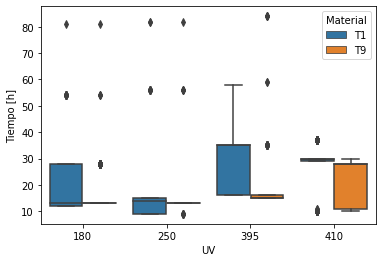

In [23]:
sns.boxplot(data=melted_df, x="UV", y="Time", hue="Material")
plt.xlabel('UV')
plt.ylabel('Tiempo [h]')
#plt.title('Sales by Quarter')

Text(0, 0.5, 'Tiempo [h]')

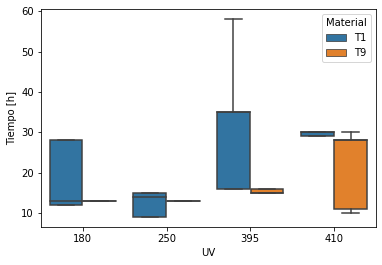

In [24]:
sns.boxplot(data=melted_df, x="UV", y="Time", hue="Material", showfliers = False)
plt.xlabel('UV')
plt.ylabel('Tiempo [h]')

Text(0, 0.5, 'Frecuencia')

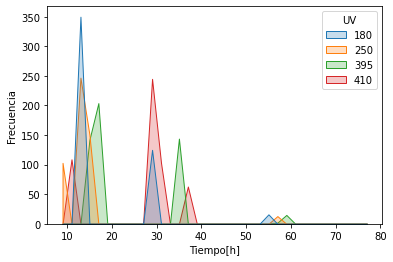

In [32]:
sns.histplot(data=melted_df,x="Time", hue="UV",element="poly", bins=range(8,80,2))
plt.xlabel('Tiempo[h]')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Material T1')

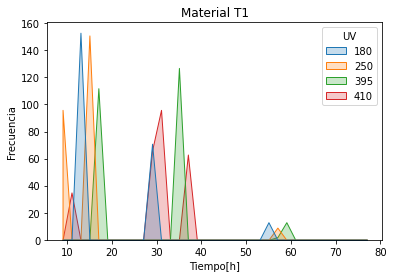

In [33]:
sns.histplot(data=melted_df[melted_df['Material']=='T1'],x="Time", hue="UV",element="poly", bins=range(8,80,2))
plt.xlabel('Tiempo[h]')
plt.ylabel('Frecuencia')
plt.title('Material T1')

Text(0.5, 1.0, 'Material T9')

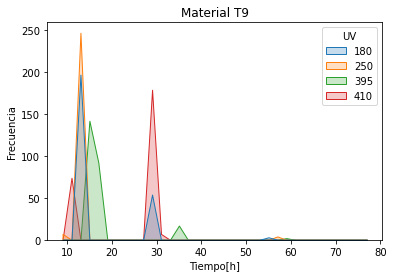

In [34]:
sns.histplot(data=melted_df[melted_df['Material']=='T9'],x="Time", hue="UV",element="poly", bins=range(8,80,2))
plt.xlabel('Tiempo[h]')
plt.ylabel('Frecuencia')
plt.title('Material T9')

sns.histplot(
    melted_df, x="Time", hue="UV", element="step",
    stat="density", common_norm=False,
)

sns.histplot(data=melted_df, x="Time", y="UV", hue="UV", bins=range(2,40,2))

sns.histplot(data=melted_df, x="Time", y="UV", hue="Material", bins=range(2,40,2))

sns.histplot(data=melted_df, x="Time", y="Material", hue="UV", bins=range(2,40,2))

Text(0.5, 1.0, 'Material T1')

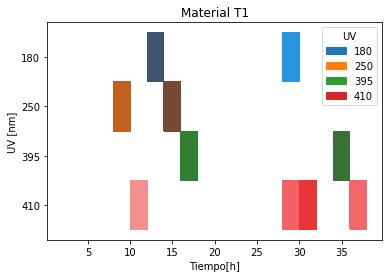

In [30]:
sns.histplot(data=melted_df[melted_df['Material']=='T1'], x="Time", y="UV", hue="UV", bins=range(2,40,2))
plt.xlabel('Tiempo[h]')
plt.ylabel('UV [nm]')
plt.title('Material T1')

Text(0.5, 1.0, 'Material T9')

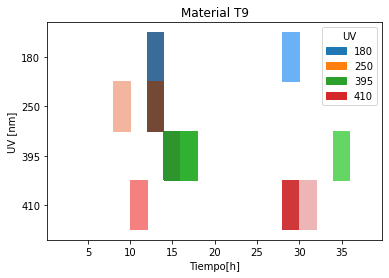

In [31]:
sns.histplot(data=melted_df[melted_df['Material']=='T9'], x="Time", y="UV", hue="UV", bins=range(2,40,2))
plt.xlabel('Tiempo[h]')
plt.ylabel('UV [nm]')
plt.title('Material T9')

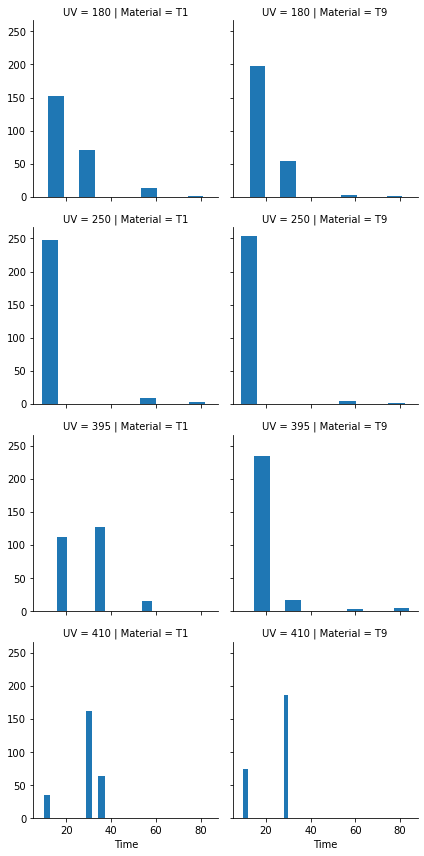

In [55]:
# Plot histograms grouped by 'Measurement_Type', using FacetGrid
g = sns.FacetGrid(melted_df, col="Material",row="UV")
g.map(plt.hist, "Time")
#g.set_titles(col_template="{col_name}")
plt.show()

In [36]:
# Filter the rows based on the condition
rows_to_remove = melted_df[melted_df['Measurement'] == 'T1_180'].tail(20)

# Remove the filtered rows from the DataFrame
melted_df = melted_df.drop(rows_to_remove.index)

# Print the updated DataFrame
#print(melted_df)

     Measurement  Time Material   UV
0         T1_180  12.0       T1  180
1         T1_180  28.0       T1  180
2         T1_180  12.0       T1  180
3         T1_180  12.0       T1  180
4         T1_180  28.0       T1  180
...          ...   ...      ...  ...
2075      T9_410  29.0       T9  410
2076      T9_410  28.0       T9  410
2077      T9_410  28.0       T9  410
2078      T9_410  10.0       T9  410
2079      T9_410  28.0       T9  410

[2060 rows x 4 columns]


In [37]:
# Create a function to return 1 if observed 0 otherwise
def check_observed(row):
    if pd.isna(row['Time']):
        flag = 0
    else:
        flag = 1
    return flag

In [38]:
# Create a censorship flag column
melted_df['observed'] =melted_df.apply(check_observed, axis=1)

# Print average of observed: the proportion of censored data in the melted_df
print(np.average(melted_df['observed']))

# Count censored data
count = len(melted_df[melted_df['observed'] == 0])

# Print the count to console
print(count)

0.9907766990291262
19


In [40]:
melted_df.Time.isnull().groupby(melted_df['Measurement']).sum().astype(int)

Measurement
T1_180    2
T1_250    2
T1_395    6
T1_410    0
T9_180    5
T9_250    1
T9_395    3
T9_410    0
Name: Time, dtype: int64

In [43]:
melted_df.dropna(subset=['Time', 'observed'], inplace= True)

In [42]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import pairwise_logrank_test

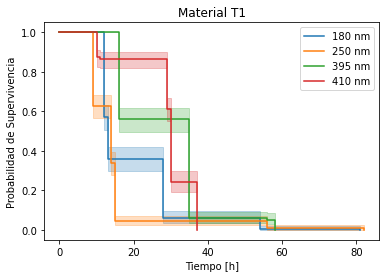

In [48]:
def plot_survival(ax, label, time, observed):
    kmf = KaplanMeierFitter()
    kmf.fit(time, observed, label=label)
    kmf.plot_survival_function(ax=ax, label=label)

# Data for different measurements
measurements = ['T1_180','T1_250', 'T1_395', 'T1_410']
colors = ['180 nm','250 nm', '395 nm', '410 nm']

# Create a subplot
fig, ax = plt.subplots()



for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    plot_survival(ax, color, time_data, observed_data)

# Customize the plot
ax.set_xlabel('Tiempo [h]')
ax.set_ylabel('Probabilidad de Supervivencia')
ax.set_title('Material T1')
ax.legend()

# Show the plot
plt.show()



#print(1-kmf.predict(20))

In [49]:
def median_survival(label, time, observed):
    kmf = KaplanMeierFitter()
    kmf.fit(time, observed, label=label)
    print(label,kmf.median_survival_time_)

In [50]:
for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    median_survival(color, time_data, observed_data)

180 nm 13.0
250 nm 14.0
395 nm 35.0
410 nm 30.0


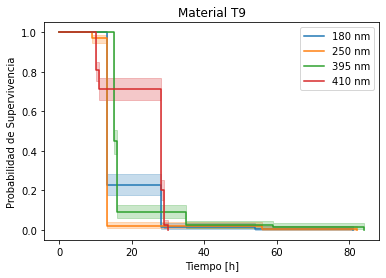

In [51]:
# Data for different measurements
measurements = ['T9_180','T9_250', 'T9_395', 'T9_410']
colors = ['180 nm','250 nm', '395 nm', '410 nm']

# Create a subplot
fig, ax = plt.subplots()

for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    plot_survival(ax, color, time_data, observed_data)

# Customize the plot
ax.set_xlabel('Tiempo [h]')
ax.set_ylabel('Probabilidad de Supervivencia')
ax.set_title('Material T9')
ax.legend()

# Show the plot
plt.show()

In [52]:
for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    median_survival(color, time_data, observed_data)

180 nm 13.0
250 nm 13.0
395 nm 15.0
410 nm 28.0


In [53]:
# Run log-rank test to compare seeds with different treatments
log_rank = pairwise_logrank_test(melted_df['Time'], melted_df['Measurement'], melted_df['observed'])#, t_0=184)
log_rank.summary

test_statistic             p    -log2(p)
T1_180 T1_250        9.496432  2.058718e-03    8.924038
       T1_395      155.368779  1.163067e-35  116.049549
       T1_410      151.956096  6.477711e-35  113.571999
       T9_180        4.834912  2.788906e-02    5.164157
       T9_250        0.203980  6.515272e-01    0.618103
       T9_395        9.514246  2.038829e-03    8.938044
       T9_410       14.839408  1.170636e-04   13.060419
T1_250 T1_395      375.841767  1.000661e-83  275.719079
       T1_410      220.107195  8.570411e-50  162.997040
       T9_180        1.734870  1.877902e-01    2.412807
       T9_250       44.362059  2.729256e-11   35.092701
       T9_395      201.615098  9.276586e-46  149.595098
       T9_410      122.228113  2.057661e-28   91.972982
T1_395 T1_410        1.055962  3.041380e-01    1.717202
       T9_180      256.490495  9.989050e-58  189.351482
       T9_250      416.284925  1.570669e-92  304.966005
       T9_395      170.502014  5.748077e-39  127.032116
       T9_410      121.318163  3.255097e-28   91.311286
T1_410 T9_180      264.031088  2.269137e-59  194.811614
       T9_250      208.125617  3.522180e-47  154.314152
       T9_395      159.975944  1.145261e-36  119.393735
       T9_410      249.948540  2.664762e-56  184.613967
T9_180 T9_250       33.588582  6.809125e-09   27.129883
       T9_395       56.826111  4.761026e-14   44.255721
       T9_410       45.048077  1.922560e-11   35.598181
T9_250 T9_395      390.032081  8.145039e-87  285.981823
       T9_410       76.406775  2.308579e-18   58.587701
T9_395 T9_410       30.343061  3.619996e-08   24.719437

In [54]:
summary = log_rank.summary
summary[summary['p']>=0.05]

,,test_statistic,p,-log2(p)
T1_180,T9_250,0.203980,0.651527,0.618103
T1_250,T9_180,1.734870,0.187790,2.412807
T1_395,T1_410,1.055962,0.304138,1.717202
